# Unsupervised Analysis Project
> *By Team 13: Jack Daoud, Natalia Gomez Aycardi, Selin Immel*
>
> *February 22nd, 2021*

## Introduction 

<b><font size="+1"><center>Windows or Mac?</center></font></b>

<img src = './_images/design/windows-mac-logo.png' width = 350>

Countless consumers have pondered this question when preparing to buy a new computer. As a result, Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. Both firms have commissioned research and analysis teams to study aspects such as system architecture, security, and overall performance.

Recently, Apple has decided to approach this question from the perspective of the Big Five personality traits as well as the Hult DNA. As such, your team has been commissioned to run an analysis on these factors.

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<b><font size="+1"><center>Big Five</center></font></b>

According to Rothmann & Coetzer, "researchers agree that almost all personality measures could be categorized according to the five-factor model of personality", which is also referred to as the big five personality dimensions (2003). 

This theory uses semantic associations in order to describe aspects of a humans personality. For example, someone who is described as "the life of a party" can be categorized as *extroverted*. This is one of the the big five dimensions, which are also known as the OCEAN model:

1. **O**penness to experience (inventive/curious vs. consistent/cautious)
2. **C**onscientiousness (efficient/organized vs. easy-going/careless)
3. **E**xtroversion (outgoing/energetic vs. solitary/reserved)
4. **A**greeableness (friendly/compassionate vs. challenging/detached)
5. **N**euroticism (sensitive/nervous vs. secure/confident)

<img src = "./_images/design/big_five.png" width = 350>

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<b><font size="+1"><center>Hult DNA</center></font></b>

The Hult DNA is a set of aspirations for the professional development of global minded business students as well as a tool to assist the alignment of their skills with future employers needs. "The foundation of the model is an extensive study by Hult Labs of over 100 of the world’s leading employers, supplemented by research from Hult and Ashridge researchers and data from Burning Glass Technologies that identify the skill gaps that keep job seekers and employers apart" (Hult, 2018).

The Hult DNA encompasses three critical competencies:

<img src = "./_images/design/hult_dna.png" width = 550>

Each competency is described by employers in terms of 9 specific behavioral skills that can be measured and developed:

<img src = "./_images/design/hult_dna_components.png" width = 550>

<br>

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br>

<br>


## Data Wrangling & Exploration

Text here


<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

## Principal Component Analysis

<br><br>

### Big Five


Text here


<img src = "./_images/analysis/factor_loadings_big5.png" width = 1000>

<br><br>

### Hult DNA

Text here


<img src = "./_images/analysis/factor_loadings_hult.png" width = 1000>

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

## Cluster Segmentation

Text here

<br> <br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

## Demographic Analysis

Text here


<br> <br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>


# Setup

<b><font size="+1">Packages, Data, & User-defined Functions</font></b>

In [1]:
# Packages, data, & user-defined functions

########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
import re


from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from sklearn.manifold        import TSNE                # t-SNE
from sklearn.datasets        import load_digits         # digits dataset
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering



########################################
# loading data and setting display options
########################################
# loading data
df         = pd.read_excel('./_data/survey_data.xlsx')
country_df = pd.read_csv('./_data/continents.csv')

# separate survey data into 3 sets
big5_df         = df.iloc[:, 1:51]            # big five survey questions
hult_df         = df.iloc[:, 51:72]           # hult dna survey questions
demographics_df = df.iloc[:, 72:79]           # respondents demographic data
country_df      = country_df.iloc[:, [0,5]]   # contients & country data


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
# User-defined functions


########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
    
    
    
########################################
# tsne_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# tsne_plotter
def tsne_plotter(bunch,
                 colors  = None,
                 x_label = "t-SNE feature 0",
                 y_label = "t-SNE feature 1"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in TSNE
colors       : color coding for target labels, default None
x_label      : x-label for t-SNE feature 0, default "t-SNE feature 0"
y_label      : y-label for t-SNE feature 1, default "t-SNE feature 1"
"""
    
    # INSTANTIATING a PCA object
    tsne = TSNE(random_state = 219)

    
    # FITTING and TRANSFORMING the data
    dataset_tsne = tsne.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_tsne[:, 0].min(), dataset_tsne[:, 0].max() + 1)
    plt.ylim(dataset_tsne[:, 1].min(), dataset_tsne[:, 1].max() + 1)

    
    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_tsne[i, 0],
                 dataset_tsne[i, 1],
                 str(bunch.target[i]),
                 color    = colors[bunch.target[i]],
                 fontdict = {'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()
    
    
    
    
    
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    

    
    
    
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# Wrangling & Cleaning

## Demographic Data




In [3]:
#country_df.columns = ['Nationality', 'Region']
# country_df
# demographics_df

In [4]:
# Demographic data

# Rename columns for ease of reference
demographics_df.columns = ['Current Laptop', 
                           'Future Laptop', 
                           'Program',
                           'Age',
                           'Gender',
                           'Nationality',
                           'Ethnicity']



##############################################################################
# Clean Nationality


# Capitalize all strings
demographics_df['Nationality'] = \
    demographics_df['Nationality'].str.capitalize()

# Loop over each row in the demographics dataframe
for index, column in demographics_df.iterrows():

    if 'and' in demographics_df.loc[index, 'Nationality'].lower() \
    or '/'   in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Mixed'    
    
    
    elif 'korea' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Korean'
   

    elif 'china' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Chinese'
      
    
    elif 'usa' in demographics_df.loc[index, 'Nationality'].lower(): 
        demographics_df.loc[index, 'Nationality'] = 'American'
    
    
    elif 'ecuador' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Ecuadorian'
    
    
    elif 'brazil' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Brazilian'
     
    
    elif 'india' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Indian'
     
    
    elif 'colombia' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Colombian'
     
    
    elif 'indonesia' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Indonesian'
     
    
    elif 'russia' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Russian'
      
    
    elif 'spain' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Spanish'

        
    elif 'germany' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'German'
        
        
    elif 'philippines' in demographics_df.loc[index, 'Nationality'].lower() \
    or 'filipino' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Filipino'
      
    
    elif 'nigeria' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Nigerian'
        
        
    elif 'canada' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Canadian'  
        
        
    elif 'peru' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Peruvian' 
       
    
    elif 'japan' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Japanese'         
    
    
    elif 'congo' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Congolese'          
        
 
    elif 'czech' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Czechian'
        
        
    elif 'dominican' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Dominican'
        

    elif 'mauritius' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Mauritian'   
        
        
    elif 'panama' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Panamanian'
        
        
    elif 'taiwan' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Taiwanese'
        
        
    elif 'belarus' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Nationality'] = 'Belarusian'
        
        
        
##############################################################################
# New column translating Nationality into Region

# Instantiate new column
demographics_df['Region'] = 0

# Loop over each row in the demographics dataframe
for index, column in demographics_df.iterrows():
    
    if 'swiss' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'ghanaian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Africa'
        
        
    elif 'pakistani' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
        
        
    elif 'portuguese' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'british' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
    
    elif 'kyrgyz' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
        
    
    elif 'belgian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'kenyan' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Africa'
        
        
    elif 'ukrainian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'venezuelan' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
        
        
    elif 'belarusian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
    
    elif 'taiwanese' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
        
    
    elif 'vietnamese' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
        
        
    elif 'norwegian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'mexican' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
        
        
    elif 'turkish' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
        
        
    elif 'italian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe' 
    
    
    elif 'thai' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
    
    
    elif 'costarrican' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas' 

        
    elif 'mixed' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Mixed'    
    
    
    elif 'korean' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
      
    
    elif 'chinese' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
      
    
    elif 'america' in demographics_df.loc[index, 'Nationality'].lower(): 
        demographics_df.loc[index, 'Region'] = 'Americas'
    
    
    elif 'ecuadorian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
    
    
    elif 'brazilian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
     
    
    elif 'indian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
     
    
    elif 'colombian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
     
    
    elif 'indonesian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
     
    
    elif 'russian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
      
    
    elif 'spanish' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'

        
    elif 'german' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'filipino' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'
      
    
    elif 'nigerian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Africa'
        
        
    elif 'canadian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'  
        
        
    elif 'peruvian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas' 
       
    
    elif 'japanese' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Asia'         
    
    
    elif 'congolese' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Africa'          
        
 
    elif 'czechian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Europe'
        
        
    elif 'dominican' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
        

    elif 'mauritian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Africa'   
        
        
    elif 'panamanian' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Americas'
        
        
    elif 'prefer not to answer' in demographics_df.loc[index, 'Nationality'].lower():
        demographics_df.loc[index, 'Region'] = 'Prefer not to answer'
        
        
        
# Replace "Windows laptop" with "Windows"
demographics_df['Current Laptop'].replace('Windows laptop',
                                          'Windows',
                                          inplace = True)

demographics_df['Future Laptop'].replace('Windows laptop',
                                         'Windows',
                                         inplace = True)



##############################################################################
# Clean Program

# Loop through each value in each row
for index, column in demographics_df.iterrows():
    
    # Substitute business analytics with shorthand
    demographics_df.loc[index, 'Program'] = \
        re.sub(r'Business Analytics', 'MsBA', demographics_df.loc[index, 'Program'])

    # Substitute disruptive innovation with shorthand    
    demographics_df.loc[index, 'Program'] = \
        re.sub(r'Disruptive innovation', 'MDI', demographics_df.loc[index, 'Program'])
    
    # Remove one year because it's already implied
    demographics_df.loc[index, 'Program'] = \
        re.sub(r'One year MsBA', 'MsBA', demographics_df.loc[index, 'Program'])
    

    
##############################################################################
# Clean Ethnicity
    
# Loop through each value in each row
for index, column in demographics_df.iterrows():
    
    # Group white and middle eastern into white
    demographics_df.loc[index, 'Ethnicity'] = \
        re.sub(r'White / Caucasian|Middle Eastern',
               'White', demographics_df.loc[index, 'Ethnicity'])

    # Group west and east asian into asian
    demographics_df.loc[index, 'Ethnicity'] = \
        re.sub(r'Far east Asian|West Asian / Indian', 
               'Asian', demographics_df.loc[index, 'Ethnicity'])
    
    # Rename native american based on the US census race grouping
    demographics_df.loc[index, 'Ethnicity'] = \
        re.sub(r'Native American', 'American Indian', demographics_df.loc[index, 'Ethnicity'])


    
    
##############################################################################
# Bucketize Age
    

# Placeholder
demographics_df['Age Range'] = ''

# Loop through each value in each row
for index, column in demographics_df.iterrows():
    
    if demographics_df.loc[index, 'Age'] >= 40:
        demographics_df.loc[index, 'Age Range'] = '40s'
        
    elif demographics_df.loc[index, 'Age'] >= 30:
        demographics_df.loc[index, 'Age Range'] = '30s'
        
    elif demographics_df.loc[index, 'Age'] >= 20:
        demographics_df.loc[index, 'Age Range'] = '20s'
    
# Check cleaned data
#demographics_df

<br>
<br>

## Big Five Data

In [6]:
# Match questions with traits & rename columns

#############################
# Personality abbreviations
#############################
# EXT - Questions to measure Extroversion.
# AGR - Questions to measure Agreeableness
# CSN - Questions to measure Conscientiousness
# EST - Questions to measure Neuroticism
# OPN - Questions to measure Openness to Experience


# Create dictionary of questions to personality
questions_traits = {
    
    "Am the life of the party"                                   : 'EXT1',
    "Feel little concern for others"                             : 'AGR1',
    "Am always prepared"                                         : 'CSN1',
    "Get stressed out easily"                                    : 'EST1',
    "Have a rich vocabulary"                                     : 'OPN1',
    
    "Don't talk a lot"                                           : 'EXT2',
    "Am interested in people"                                    : 'AGR2',
    "Leave my belongings around"                                 : 'CSN2',
    "Am relaxed most of the time"                                : 'EST2',
    "Have difficulty understanding abstract ideas"               : 'OPN2',
    
    "Feel comfortable around people"                             : 'EXT3',
    "Insult people"                                              : 'AGR3',
    "Pay attention to details"                                   : 'CSN3',
    "Worry about things"                                         : 'EST3',
    "Have a vivid imagination"                                   : 'OPN3',
    
    "Keep in the background"                                     : 'EXT4',
    "Sympathize with others' feelings"                           : 'AGR4',
    "Make a mess of things"                                      : 'CSN4',
    "Seldom feel blue"                                           : 'EST4',
    "Am not interested in abstract ideas"                        : 'OPN4',
    
    "Start conversations"                                        : 'EXT5',
    "Am not interested in other people's problems"               : 'AGR5',
    "Get chores done right away"                                 : 'CSN5',
    "Am easily disturbed"                                        : 'EST5',
    "Have excellent ideas"                                       : 'OPN5',
    
    "Have little to say"                                         : 'EXT6',
    "Have a soft heart"                                          : 'AGR6',
    "Often forget to put things back in their proper place"      : 'CSN6',
    "Get upset easily"                                           : 'EST6',
    "Do not have a good imagination"                             : 'OPN6',
    
    "Talk to a lot of different people at parties"               : 'EXT7',
    "Am not really interested in others"                         : 'AGR7',
    "Like order"                                                 : 'CSN7',
    "Change my mood a lot"                                       : 'EST7',
    "Am quick to understand things"                              : 'OPN7',
    
    "Don't like to draw attention to myself"                     : 'EXT8',
    "Take time out for others"                                   : 'AGR8',
    "Shirk my duties"                                            : 'CSN8',
    "Have frequent mood swings"                                  : 'EST8',
    "Use difficult words"                                        : 'OPN8',
    
    "Don't mind being the center of attention"                   : 'EXT9',
    "Feel others' emotions"                                      : 'AGR9',
    "Follow a schedule"                                          : 'CSN9',
    "Get irritated easily"                                       : 'EST9',
    "Spend time reflecting on things"                            : 'OPN9',
    
    "Am quiet around strangers"                                  : 'EXT10',
    "Make people feel at ease"                                   : 'AGR10',
    "Am exacting in my work"                                     : 'CSN10',
    "Often feel blue"                                            : 'EST10',
    "Am full of ideas"                                           : 'OPN10'
}


# Rename columns
big5_df.rename(columns = questions_traits, inplace = True)

# Check cleaned data
# big5_df

In [7]:
# Identification of reversals


# positive questions that add to the trait
positive_questions = [ 
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # EXT 5
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # EST 8
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # AGR 6
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # CSN 6
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # OPN 7
]

# negative questions that substract from the trait
negative_questions = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10',                      # EXT 5
    'EST2','EST4',                                            # EST 2
    'AGR1','AGR3','AGR5','AGR7',                              # AGR 4
    'CSN2','CSN4','CSN6','CSN8',                              # CSN 4
    'OPN2','OPN4','OPN6',                                     # OPN 3
]


# dictionary of each question and its reversal
crosscheck_questions = {
    
    # Extroversion
    'EXT1' : 'EXT2',
    'EXT3' : 'EXT4',
    'EXT5' : 'EXT6',
    'EXT7' : 'EXT8',
    'EXT9' : 'EXT10',
    
    # Agreeableness
    'AGR2' : 'AGR1',
    'AGR4' : 'AGR3',
    'AGR6' : 'AGR5',
    'AGR8' : 'AGR7',
    
    # Conscientiousness
    'CSN1' : 'CSN2',
    'CSN3' : 'CSN4',
    'CSN5' : 'CSN6',
    'CSN7' : 'CSN8',
    
    # Neuroticism
    'EST1' : 'EST2',
    'EST4' : 'EST10',
    
    # Openness
    'OPN1' : 'OPN2',
    'OPN3' : 'OPN4',
    'OPN5' : 'OPN6'
    
}

In [8]:
# Check validity of survey responses & drop invalid ones



##############################################################################
# Flag invalid responses

# Loop over column names of Big 5 DF
for column_name in big5_df.columns:
    
    # Loop over keys and values of Crosscheck Questions dict
    for key, value in crosscheck_questions.items():
        
        # If column from DF is in the keys of the dict
        if column_name in key:
            
            # Create a new column of the key-value pair as a placeholder for flag
            big5_df[key + ' & ' + value] = 0
            
            # Loop over each row
            for index, column in big5_df.iterrows():
                
                # If the values in each column match
                # Exclude the neutral answers
                if big5_df.loc[index, key] == big5_df.loc[index, value] \
                & big5_df.loc[index, key] != 3:
                    
                    # Flag the row
                    big5_df.loc[index, key + ' & ' + value] = 1
    
    
    
##############################################################################
# Sum flags

# Save list of flag column names
#flag_columns = big5_df.iloc[:,50:].columns

# Print each flag column
#for flag in flag_columns:
#    print(f"big5_df['{flag}'] + \\")
    
# Sum the flags
big5_df['FLAG_SUM']=big5_df['EXT1 & EXT2'] + \
                    big5_df['CSN1 & CSN2'] + \
                    big5_df['EST1 & EST2'] + \
                    big5_df['OPN1 & OPN2'] + \
                    big5_df['AGR2 & AGR1'] + \
                    big5_df['EXT3 & EXT4'] + \
                    big5_df['CSN3 & CSN4'] + \
                    big5_df['OPN3 & OPN4'] + \
                    big5_df['AGR4 & AGR3'] + \
                    big5_df['EST4 & EST10'] + \
                    big5_df['EXT5 & EXT6'] + \
                    big5_df['CSN5 & CSN6'] + \
                    big5_df['OPN5 & OPN6'] + \
                    big5_df['AGR6 & AGR5'] + \
                    big5_df['EXT7 & EXT8'] + \
                    big5_df['CSN7 & CSN8'] + \
                    big5_df['AGR8 & AGR7'] + \
                    big5_df['EXT9 & EXT10']



##############################################################################
# Remove invalid survey responses

# There are a total of 18 validity checks in the form of reversal questions.

# If a respondent answers with identical scores for more than half of those
# questions (9 or more), then than respondents submission will be considered 
# invalid and they will be dropped from the analysis


# Check for natural cutoff of number of invalid responses
big5_df.loc[:, 'FLAG_SUM'].value_counts()

# How many will we cut off with 6 or greater flags? = 16
len(big5_df.loc[big5_df['FLAG_SUM'] > 5, :])


# Save index of respondents to drop
respondents_to_drop = big5_df.loc[big5_df['FLAG_SUM'] > 5, :].index

In [9]:
# Big 5 score system adjustment, aggreggation, & scaling



##############################################################################
# Change scoring system from 1 through 5 to -2 through 2 depending on whether
# the question adds or substracts from each trait

# Positive scores
positive_scores = {1 : -2,
                   2 : -1,
                   3 :  0, 
                   4 :  1,
                   5 :  2}

# Negative scores
negative_scores = {1 :  2,
                   2 :  1,
                   3 :  0,
                   4 : -1,
                   5 : -2}

# Replace values in positive questions
big5_df[positive_questions] = \
    big5_df[positive_questions].replace(positive_scores)

# Replace values in negative questions
big5_df[negative_questions] = \
    big5_df[negative_questions].replace(negative_scores)



##############################################################################
# Aggreggate Big Five Scores

# Instantiate list of traits
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']

# Loop through each trait in the list of traits
for trait in traits:
    
    # Loop over the list of column names with the variable col
    # and add it to a new list if col containts one of the traits
    trait_cols = sorted([col for col in big5_df.columns if trait in col])
    
    # Sum each of the scores for each trait
    big5_df[trait] = big5_df[trait_cols].sum(axis=1)
    
    # Place aggreggated score for each trait in DF
    big5_df[trait]

    
    # Code for looping over column names is adapted from:
    # https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string    
    
# Extract aggregated data into separate DF
big5_agg = big5_df.iloc[:, -5:]



##############################################################################
# Scale Big Five Scores

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big5_agg)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(big5_agg)


# converting scaled data into a DataFrame
big5_agg_scaled = pd.DataFrame(X_scaled)


# reattaching column names
big5_agg_scaled.columns = big5_agg.columns

In [10]:
# Plot distributions of Big 5 results

# Rename columns for aesthetics
big5_abbreviations = {
    'EXT' : 'Extroversion',
    'EST' : 'Neuroticism',
    'AGR' : 'Agreeableness',
    'CSN' : 'Conscientiousness',
    'OPN' : 'Openness to Experience'
}

big5_agg_scaled.rename(columns = big5_abbreviations, inplace = True)

# Set figure size
fig, ax = plt.subplots(figsize = (12, 8))


# Initialize a counter
count = 0


# Loop to create visualizations
for col in big5_agg_scaled:

    # condition to break
    if count == 5:
        break
    
    # increase count
    count += 1
    
    # Prepare histograms
    plt.subplot(2, 3, count)
    sns.histplot(x = big5_agg_scaled[col], color = 'steelblue')
    
plt.tight_layout()
plt.savefig('./_images/analysis/histograms_big5.png')
#plt.show()
plt.close()

In [11]:
# Plot correlation heatmap of aggregated Big 5 results

# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = big5_agg_scaled.corr(method = 'pearson').round(2)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap   = 'coolwarm',
            square = True,
            annot  = True,
            mask   = mask)


# saving and displaying the heatmap
plt.savefig('./_images/analysis/heatmap_big5.png')
#plt.show()
plt.close()

<br><br>

## Hult DNA Data

In [12]:
# Drop duplicate columns

hult_df = hult_df[hult_df.columns.drop(list(hult_df.filter(regex='.1')))]

In [13]:
# Match questions with traits & rename columns

#############################
# Personality abbreviations
#############################
# TH - Questions to measure Thinking
# CM - Questions to measure Communicating
# TB - Questions to measure Team Building
# LD - Questions to measure Leadership

# Create dictionary of questions to personality
questions_traits = {
"See underlying patterns in complex situations"                              : 'TH1',
"Don't  generate ideas that are new and different"                           : 'TH2',
"Demonstrate an awareness of personal strengths and limitations"             : 'TH3',
"Display a growth mindset"                                                   : 'TH4',
"Respond effectively to multiple priorities"                                 : 'TH5', 
"Take initiative even when circumstances, objectives, or rules aren't clear" : 'LD1', 
"Encourage direct and open discussions"                                      : 'CM1',
"Listen carefully to others"                                                 : 'CM2',
"Don't persuasively sell a vision or idea"                                   : 'CM3',
"Build cooperative relationships"                                            : 'TB1',
"Work well with people from diverse cultural backgrounds"                    : 'TB2',
"Effectively negotiate interests, resources, and roles"                      : 'CM4', 
"Can't rally people on the team around a common goal"                        : 'TB3',
"Translate ideas into plans that are organized and realistic"                : 'TH6',
"Resolve conflicts constructively"                                           : 'TB4',
"Seek and use feedback from teammates"                                       : 'TH7', 
"Coach teammates for performance and growth"                                 : 'TB5',
"Drive for results"                                                          : 'LD2'  
}


# positive questions that add to the trait
positive_questions = [ 
    'TH1', 'TH3', 'TH4', 'TH5', 'TH6', 'TH7',  # TH 6    
    'CM1', 'CM2', 'CM3', 'CM4',                # CM 4
    'TB1', 'TB2', 'TB4', 'TB5',                # TB 6
    'LD1', 'LD2'                               # LD 2
]

# negative questions that substract from the trait
negative_questions = [ 
    'TH2',                                    # TH 1
    'CM3',                                    # CM 1
    'TB3',                                    # TB 1
]



# Rename columns
hult_df.rename(columns = questions_traits, inplace = True)

# Check cleaned data
# hult_df

In [14]:
# Hult DNA score system adjustment, aggreggation, & scaling


##############################################################################
# Change scoring system from 1 through 5 to -2 through 2 depending on whether
# the question adds or substracts from each trait

# Positive scores
positive_scores = {1 : -2,
                   2 : -1,
                   3 :  0, 
                   4 :  1,
                   5 :  2}

# Negative scores
negative_scores = {1 :  2,
                   2 :  1,
                   3 :  0,
                   4 : -1,
                   5 : -2}

# Replace values in positive questions
hult_df[positive_questions] = \
    hult_df[positive_questions].replace(positive_scores)

# Replace values in negative questions
hult_df[negative_questions] = \
    hult_df[negative_questions].replace(negative_scores)

##############################################################################
# Aggreggate Hult DNA Scores

# Instantiate list of traits
traits = ['TH', 'CM', 'TB', 'LD']

# Loop through each trait in the list of traits
for trait in traits:
    
    # Loop over the list of column names with the variable col
    # and add it to a new list if col containts one of the traits
    trait_cols = sorted([col for col in hult_df.columns if trait in col])
    
    # Sum each of the scores for each trait
    hult_df[trait] = hult_df[trait_cols].sum(axis=1)
    
    # Place aggreggated score for each trait in DF
    hult_df[trait]

    
    # Code for looping over column names is adapted from:
    # https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string    
    
# Extract aggregated data into separate DF
hult_agg = hult_df.iloc[:, -4:]

##############################################################################
# Scale Hult DNA Scores

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_agg)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(hult_agg)


# converting scaled data into a DataFrame
hult_agg_scaled = pd.DataFrame(X_scaled)


# reattaching column names
hult_agg_scaled.columns = hult_agg.columns

In [15]:
# Plot distributions of Hult DNA results

# Rename columns for aesthetics
hult_dna_abbreviations = {
    'TH' : 'Thinking',
    'CM' : 'Communicating',
    'TB' : 'Team Building',
    'LD' : 'Leadership'
}

hult_agg_scaled.rename(columns = hult_dna_abbreviations, inplace = True)

# Set figure size
fig, ax = plt.subplots(figsize = (12, 8))


# Initialize a counter
count = 0


# Loop to create visualizations
for col in hult_agg_scaled:

    # condition to break
    if count == 5:
        break
    
    # increase count
    count += 1
    
    # Prepare histograms
    plt.subplot(2, 3, count)
    sns.histplot(x = hult_agg_scaled[col], color = 'steelblue', bins='fd')
    
plt.tight_layout()
plt.savefig('./_images/analysis/histograms_hult_dna.png')
#plt.show()
plt.close()

In [16]:
# Plot correlation heatmap of aggregated Hult DNA results

# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = hult_agg_scaled.corr(method = 'pearson').round(2)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap   = 'coolwarm',
            square = True,
            annot  = True,
            mask   = mask)


# saving and displaying the heatmap
plt.savefig('./_images/analysis/heatmap_hult_dna.png')
#plt.show()
plt.close()

<br><br>

## Merged Data

In [17]:
# Merge & export aggregated & scaled data from two surveys

# Merge
agg_scaled_df = pd.concat([big5_agg_scaled, hult_agg_scaled], axis = 1)

# Export as CSV
#agg_scaled_df.to_csv('./_data/aggreggated_scaled_results.csv')

In [18]:
# Plot correlation heatmap of merged aggregated results


# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = agg_scaled_df.corr(method = 'pearson').round(2)


# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            mask = mask)


# saving and displaying the heatmap
plt.savefig('./_images/analysis/heatmap_merged.png')
#plt.show()
plt.close()

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# Principal Component Analysis (PCA)

## Big Five Data

PC 1 : 0.365
PC 2 : 0.19
PC 3 : 0.183
PC 4 : 0.147
PC 5 : 0.114


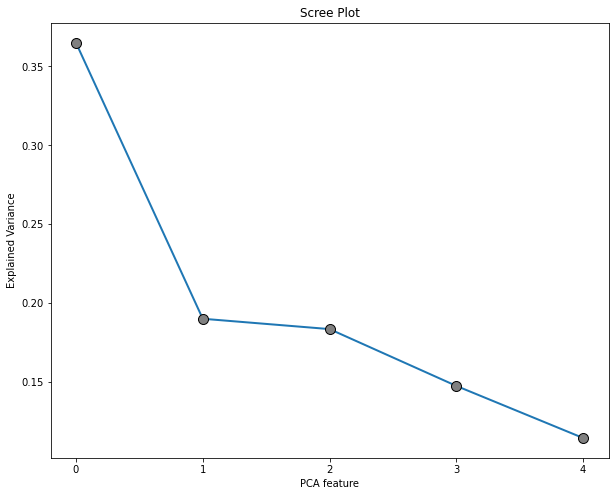

In [19]:
# Determine the number of Principal Components

# Drop invalid survey respondents
big5_agg_scaled.drop(respondents_to_drop, axis = 0, inplace = True)


# INSTANTIATING a PCA object with no limit to principal components
pca_big5 = PCA(n_components = None,
               random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca_big5 = pca_big5.fit_transform(big5_agg_scaled)




# component number counter
component_number = 0

# looping over each principal component
for variance in pca_big5.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")


    
    
# calling the scree_plot function
scree_plot(pca_object = pca_big5)

In [20]:
# Number of PC's = 3

print("Variance Ratios =", pca_big5.explained_variance_ratio_[:3].round(2))
print("Sum =", round(pca_big5.explained_variance_ratio_[:3].sum(), 2))

Variance Ratios = [0.37 0.19 0.18]
Sum = 0.74


In [21]:
# Plot factor loadings

# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca_big5.components_[:3], 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2],
           ["Team Leader", "Networker", "Unifier"],
           rotation = 0)

plt.xticks(range(0, 5),
           big5_agg_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")

# saving the plot
plt.savefig('./_images/analysis/factor_loadings_big5.png')

# displaying the plot
#plt.show()
plt.close()

In [22]:
# Export PC Factor Loadings as Excel

# transposing pca components
factor_loadings_big5 = pd.DataFrame(np.transpose(pca_big5.components_))


# naming rows as original features
factor_loadings_big5 = factor_loadings_big5.set_index(big5_agg_scaled.columns)


# checking the result
print(factor_loadings_big5.iloc[:, :3])


# saving to Excel
factor_loadings_big5.to_excel('./_data/factor_loadings_big5.xlsx')

                               0         1         2
Extroversion           -0.419320 -0.371166  0.701560
Neuroticism             0.256823  0.821141  0.468188
Agreeableness          -0.539856  0.184516  0.073586
Conscientiousness      -0.422930  0.270029 -0.531752
Openness to Experience -0.536562  0.284607  0.020933


<br><br>

## Hult DNA Data

PC 1 : 0.654
PC 2 : 0.174
PC 3 : 0.089
PC 4 : 0.083


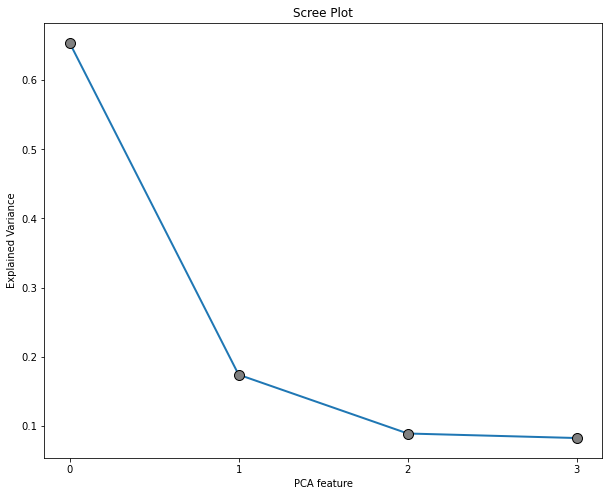

In [23]:
# Determine the number of Principal Components

# Drop invalid survey respondents
hult_agg_scaled.drop(respondents_to_drop, axis = 0, inplace = True)


# INSTANTIATING a PCA object with no limit to principal components
pca_hult = PCA(n_components = None,
               random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca_hult = pca_hult.fit_transform(hult_agg_scaled)




# component number counter
component_number = 0

# looping over each principal component
for variance in pca_hult.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")


    
    
# calling the scree_plot function
scree_plot(pca_object = pca_hult)

In [24]:
# Number of PC's = 2

print("Variance Ratios =", pca_hult.explained_variance_ratio_[:2].round(2))
print("Sum =", round(pca_hult.explained_variance_ratio_[:2].sum(), 2))

Variance Ratios = [0.65 0.17]
Sum = 0.83


In [25]:
# Plot factor loadings

# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca_hult.components_[:2], 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1],
           ["Growth Mindset (-ve)", "Egotistic"],
           rotation = 0)

plt.xticks(range(0, 4),
           hult_agg_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")

# saving the plot
plt.savefig('./_images/analysis/factor_loadings_hult.png')

# displaying the plot
#plt.show()
plt.close()

In [26]:
# Export PC Factor Loadings as Excel

# transposing pca components
factor_loadings_hult = pd.DataFrame(np.transpose(pca_hult.components_))


# naming rows as original features
factor_loadings_hult = factor_loadings_hult.set_index(hult_agg_scaled.columns)


# checking the result
print(factor_loadings_hult.iloc[:, :2])


# saving to Excel
factor_loadings_hult.to_excel('./_data/factor_loadings_hult.xlsx')

                      0         1
Thinking      -0.534896 -0.238862
Communicating -0.400845  0.837392
Team Building -0.530797  0.083854
Leadership    -0.521023 -0.484446


<br><br>

## Customer-Level Factor Loading

In [27]:
# Customer-Level Factor Loading (Prepare data)

# converting into a DataFrame 
customer_pca_big5 = pd.DataFrame(customer_pca_big5)
customer_pca_hult = pd.DataFrame(customer_pca_hult)


# renaming columns
customer_pca_big5.columns = factor_loadings_big5.columns
customer_pca_hult.columns = factor_loadings_hult.columns

# concatenate hult & big5 data
customer_pca = pd.concat([customer_pca_big5.iloc[:, :3],
                         customer_pca_hult.iloc[:,:2]], 
                        axis = 1)

# naming each principal component
customer_pca.columns = ['Team Leader (-ve)',                 
                        'Networker',          
                        'Unifier (-ve)',
                        'Growth Mindset (-ve)',           
                        'Egocentric']


# check results
#customer_pca

# export loadings
customer_pca.to_excel('./_data/PCA_factor_loadings.xlsx', index = False)

In [28]:
# Proportions per Persona (using 1 standard deviation)

total          = len(customer_pca)

team_lead      = len(customer_pca.loc[ : , 'Team Leader (-ve)']\
                     [customer_pca.loc[ : , 'Team Leader (-ve)'] < -1]) * 100

networker      = len(customer_pca.loc[ : , 'Networker']\
                     [customer_pca.loc[ : , 'Networker'] > 1]) * 100

unifier        = len(customer_pca.loc[ : , 'Unifier (-ve)']\
                     [customer_pca.loc[ : , 'Unifier (-ve)'] < -1]) * 100

growth_mindset = len(customer_pca.loc[ : , 'Growth Mindset (-ve)']\
                     [customer_pca.loc[ : , 'Growth Mindset (-ve)'] < -1]) * 100

egocentric     = len(customer_pca.loc[ : , 'Egocentric']\
                     [customer_pca.loc[ : , 'Egocentric'] > 1]) * 100


print(f"""

               Proportion of Persona
               ---------------------
Team Leaders   | {round(team_lead/total, 2)}%
               |
Networkers     | {round(networker/total, 2)}%
               |
Unifiers       | {round(unifier/total, 2)}%
               |
Growth Mindset | {round(growth_mindset/total, 2)}%
               |
Egocenteric    | {round(egocentric/total, 2)}%
               ---------------------

""")



               Proportion of Persona
               ---------------------
Team Leaders   | 23.14%
               |
Networkers     | 14.88%
               |
Unifiers       | 16.53%
               |
Growth Mindset | 31.4%
               |
Egocenteric    | 11.57%
               ---------------------




<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# Cluster Segmentation

In [29]:
# Rescale data

# Check variance among clusters
#np.var(customer_pca)

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(customer_pca)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(customer_pca)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Team Leader (-ve)',         
                      'Networker',          
                      'Unifier (-ve)', 
                      'Growth Mindset (-ve)',           
                      'Egocentric']


# checking pre- and post-scaling variance
#print(np.var(customer_pca), '\n\n')
#print(np.var(pca_scaled))

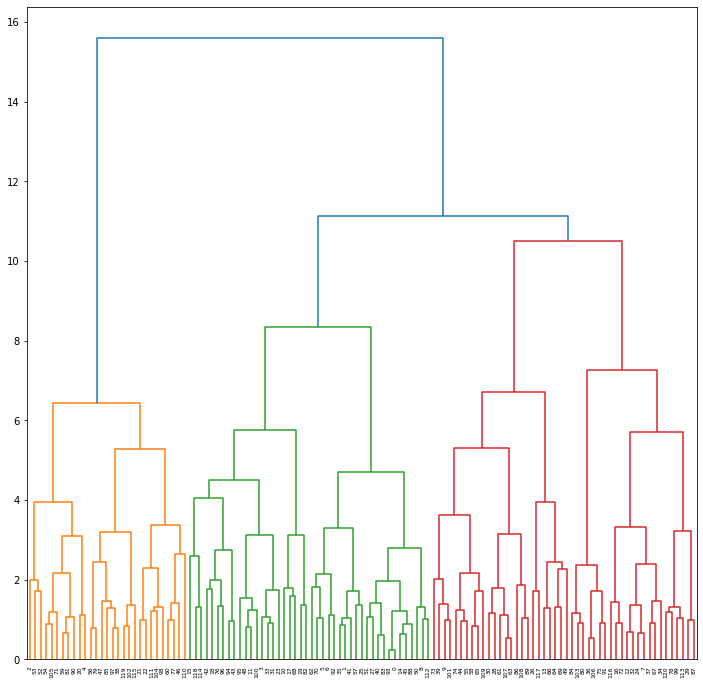

In [30]:
# Dendogram Plot

# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./_images/analysis/standard_hierarchical_clust_ward.png')
plt.show()

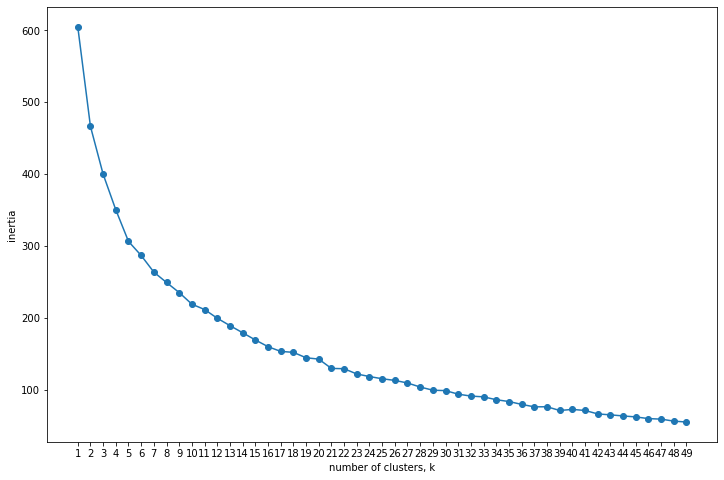

In [31]:
# Inertia Plot

# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [32]:
# Develop k-Means model (3 clusters)

# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    59
2    35
1    27
Name: Cluster, dtype: int64


<br>

## Centroids per Cluster

In [33]:
# Centroids for each cluster

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Team Leader (-ve)',         
                            'Networker',          
                            'Unifier (-ve)', 
                            'Growth Mindset (-ve)',           
                            'Egocentric']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Team Leader (-ve),Networker,Unifier (-ve),Growth Mindset (-ve),Egocentric
0,0.72,-0.11,0.01,0.78,0.15
1,-0.55,0.10,-1.03,-0.91,0.49
2,-0.79,0.11,0.78,-0.61,-0.63


In [34]:
# Merge clusters to DF

# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         customer_pca],
                         axis = 1)


# checking results
#clst_pca_df

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# Demographic Analysis

## Data Prep

In [41]:
# Prepare data for demographic analysis

# Drop invalid respondents
#demographics_df.drop(respondents_to_drop, axis = 0, inplace = True)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([demographics_df.loc[ : , ['Current Laptop',
                                                          'Future Laptop',
                                                          'Program',
                                                          'Age Range',
                                                          'Gender',
                                                          'Ethnicity',
                                                          'Region']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current Laptop',
                              'Future Laptop',
                              'Program',
                              'Age Range',
                              'Gender',
                              'Ethnicity',
                              'Region',
                              'Cluster',
                              'Team Leader (-ve)',         
                              'Networker',          
                              'Unifier (-ve)', 
                              'Growth Mindset (-ve)',           
                              'Egocentric']


# checking the results
#final_pca_clust_df

<br>

## Current Laptop

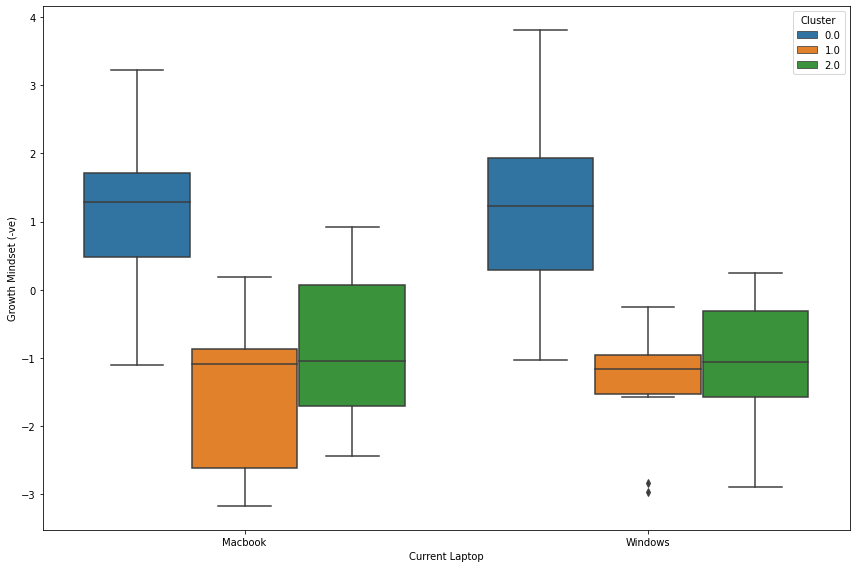

In [36]:
########################
# Current Laptop
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current Laptop',
            y = 'Growth Mindset (-ve)',
            hue = 'Cluster',
            data = final_pca_clust_df)




# formatting and displaying the plot
plt.tight_layout()

# saving the plot
#plt.savefig('./_images/analysis/demo_current_laptop_growth_mindset.png')


plt.show()



<br>

## Future Laptop

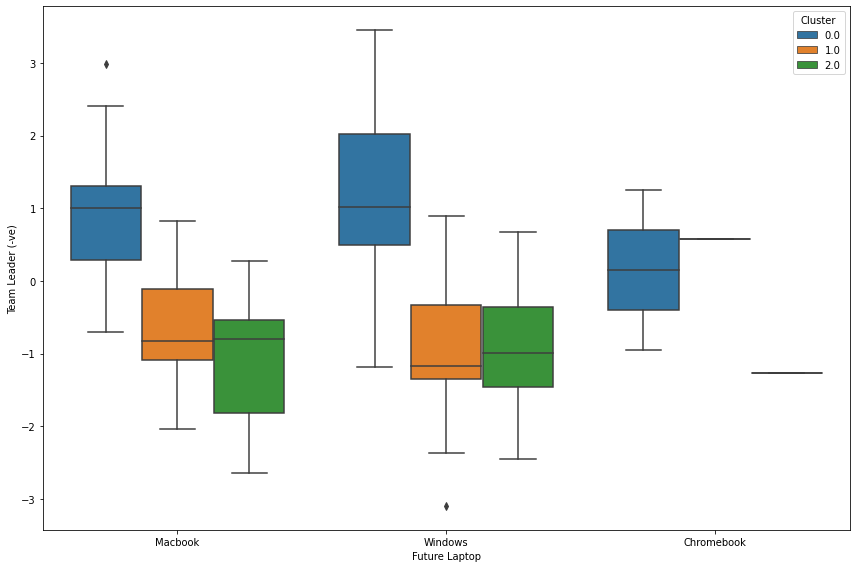

In [39]:
########################
# Future Laptop
########################

# PC NAME
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Future Laptop',
            y = 'Team Leader (-ve)',  # change this one to look at different personas
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br>

## Program

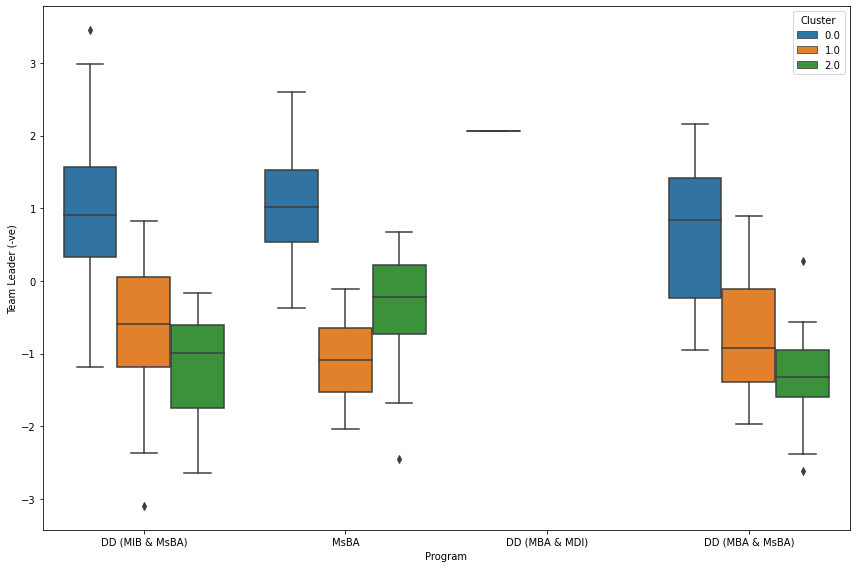

In [44]:
########################
# Program
########################

# PC NAME
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Program',
            y = 'Team Leader (-ve)',  # change this one to look at different personas
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br>

## Age Range

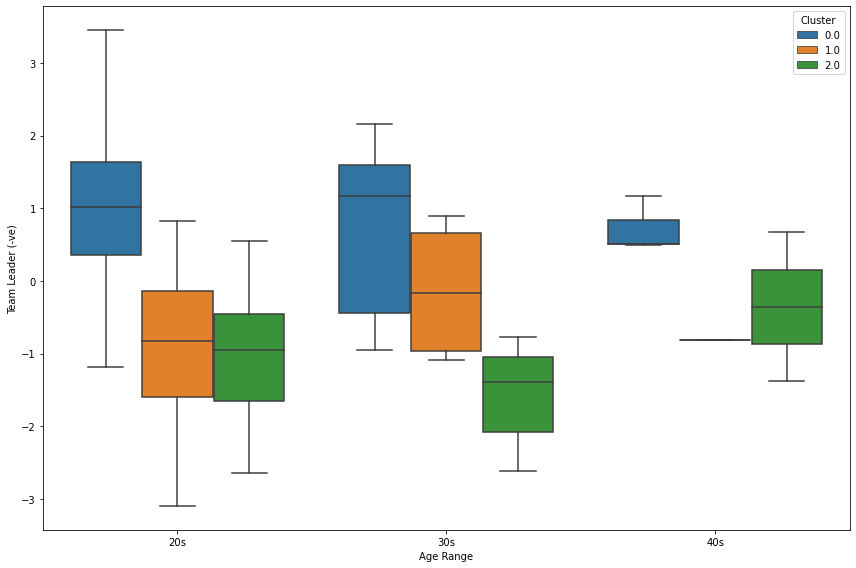

In [45]:
########################
# Age Range
########################

# PC NAME
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Range',
            y = 'Team Leader (-ve)',  # change this one to look at different personas
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br>

## Gender

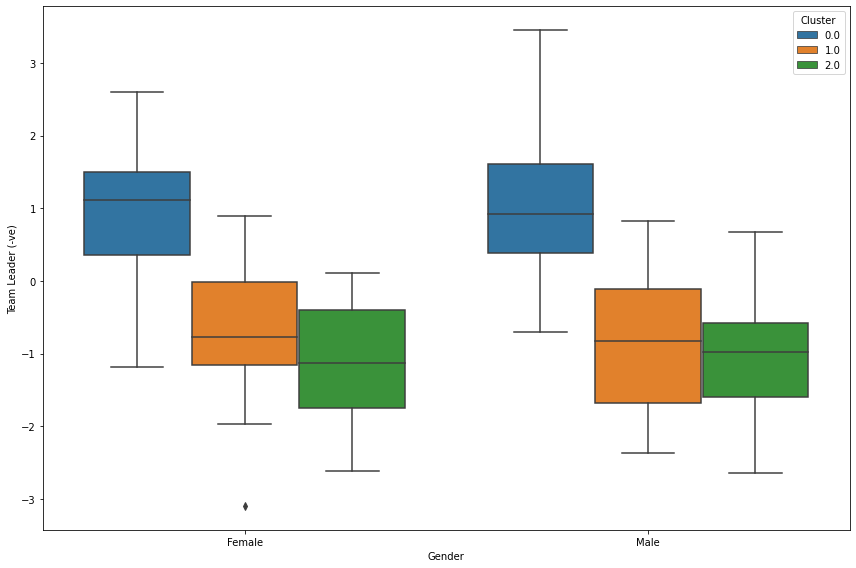

In [46]:
########################
# Gender
########################

# PC NAME
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Team Leader (-ve)',  # change this one to look at different personas
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br>

## Region

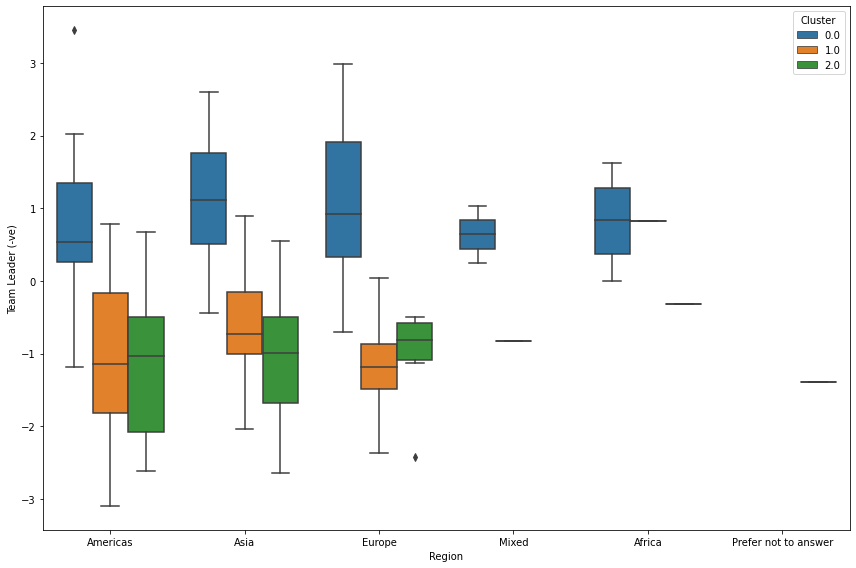

In [42]:
########################
# Region
########################

# PC NAME
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Team Leader (-ve)',  # change this one to look at different personas
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br>

## Ethnicity

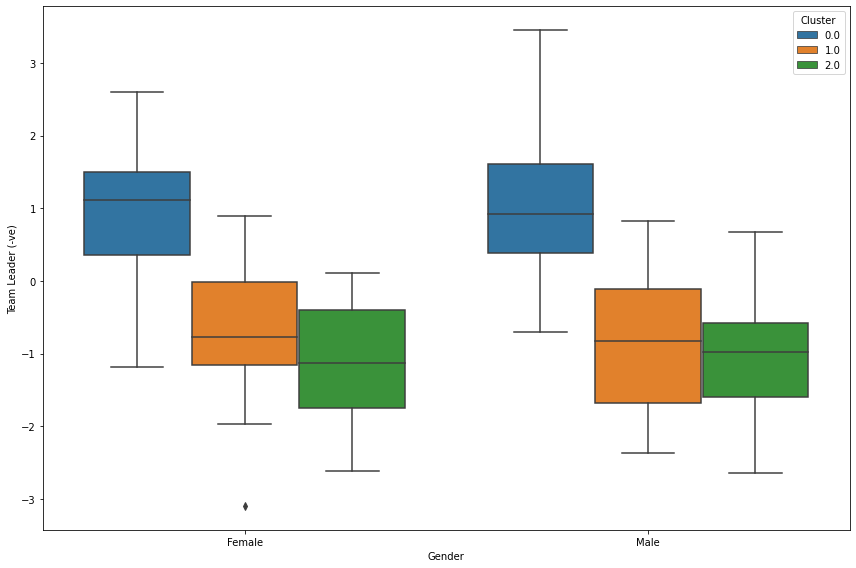

In [47]:
########################
# Ethnicity
########################

# PC NAME
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Team Leader (-ve)',  # change this one to look at different personas
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>

# References

> Rothmann, S., & Coetzer, E. P. (2003). The big five personality dimensions and job performance. Sa Journal of Industrial Psychology, 29(1), 68–74.

> Hult (2018-19). Hult DNA Development Guide. Hult International. Business School.